##### Sergio Duque Mejía, c.c 1036654435
##### Mail: sergio.duquem@udea.edu.co

## Import the libraries

In [72]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Dense,Flatten

## import the data
I used the mnist data from tf.keras.datasets to practice the Flatten layer.

In [73]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() # importing mnis from tf.keras.datasets

I try to explore the results of the model, with all the most common feature scalers:

In [98]:
def standardScaler(image):
    return (image - image.mean())/(image.std())

def maxAbsScaler(label):
    return label/max(abs(label))

def minMaxScaler(image):
    return (image - min(image))/(max(image) - min(image))

The best one for the result is using standard Scaler for the X_train data:

In [99]:
nm_x = standardScaler(X_train)
#nm_x = maxAbsScaler(X_train)
#nm_x = minMaxScaler(image):

As we see in class, define a model with InputLayer,Flatten (because the (28,28) shape per unit in X_Train ) and Dense for the hidden and output layer

In [76]:
def get_model(input_shape):
    model=Sequential([
                  InputLayer(input_shape=input_shape),
                  Flatten(),
                  #Dense(units=50,activation='relu',name='layer_hidden'),
                  Dense(units=16,activation='relu',name='layer_hidden'),
                  Dense(units=10,activation='softmax',name='output_layer')
                 ])
    return model

Using more than 20 neuron, the result is really slow so I keep the original 16 neurons.

In [77]:
model = get_model(nm_x[0].shape) # get the Sequential model

As we see in the summary, flatten transform a (28,28) data into a (784,) data. This is why we can get 12560 params for the hidden layer and 170 params for the output layer

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_hidden (Dense)         (None, 16)                12560     
_________________________________________________________________
output_layer (Dense)         (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


* compiling with sgd optimizer (and all of their default parameters) made in my case, the best accuracy model.
* I used sparse_categorical_crossentropy because i am passing y_train as a integer vector that describe every label.
* I'm looking for the accuracy  in the model so thats my metric

In [79]:
model.compile(optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

select a random seed

In [80]:
tf.random.set_seed(10)

### Fit for epochs=10, validation_split=0.1:

In [81]:
epochs=10
myhistory=model.fit(nm_x, y_train,  epochs=epochs, batch_size=32, validation_split=0.1, verbose=False)

In [82]:
print(myhistory.history['val_accuracy'][-1], "validation set accuracy")
print(myhistory.history['accuracy'][-1], "training set accuracy")

0.9558333158493042 validation set accuracy
0.951796293258667 training set accuracy


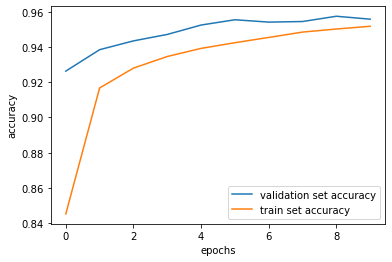

In [83]:
import matplotlib.pyplot as plt
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

In [100]:
loss, accuracy=model.evaluate(X_test, y_test)
print(accuracy, "accuracy respect to the test data")

313/313 [==============================] - 0s 765us/step - loss: 15.4418 - accuracy: 0.9011
0.9010999798774719 accuracy respect to the test data


### Fit for epochs=25, validation_split=0.05:

In [108]:
epochs=25
myhistory2=model.fit(nm_x, y_train,  epochs=epochs, batch_size=32, validation_split=0.1, verbose=False)

In [109]:
print(myhistory2.history['val_accuracy'][-1], "validation set accuracy")
print(myhistory2.history['accuracy'][-1], "training set accuracy")

0.9618333578109741 validation set accuracy
0.9746111035346985 training set accuracy


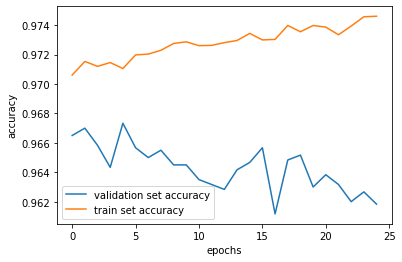

In [110]:
xvals=range(epochs)
fig,ax=plt.subplots(1,1)
ax.plot(xvals, myhistory2.history['val_accuracy'],label='validation set accuracy')
ax.plot(xvals, myhistory2.history['accuracy'],label='train set accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()

In [111]:
loss, accuracy=model.evaluate(X_test, y_test)
print(accuracy, "accuracy respect to the test data")

313/313 [==============================] - 0s 726us/step - loss: 18.6105 - accuracy: 0.9191
0.9190999865531921 accuracy respect to the test data


Conclution: In this case, training data is getting train but validation data no, this is the case of a overfitting.
Clearly, the accuracy is better in a overfit but we can not trust in this result with respect to the test data.

## make predictions

I made a prediction using the result in the epochs=10,validation_split=0.1, this is the results

In [86]:
y_test # results to compare

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [85]:
y_predicted = model.predict(X_test) # make the prediction

In [95]:
np.ceil(y_predicted) # the prediction was showed in the one-hot encoding

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [88]:
y_p2 = np.argmax(y_predicted, axis=1) # using np.argmax, I transform one-hot encoding to numerical encoding
y_p2

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### plot the results for the prediction

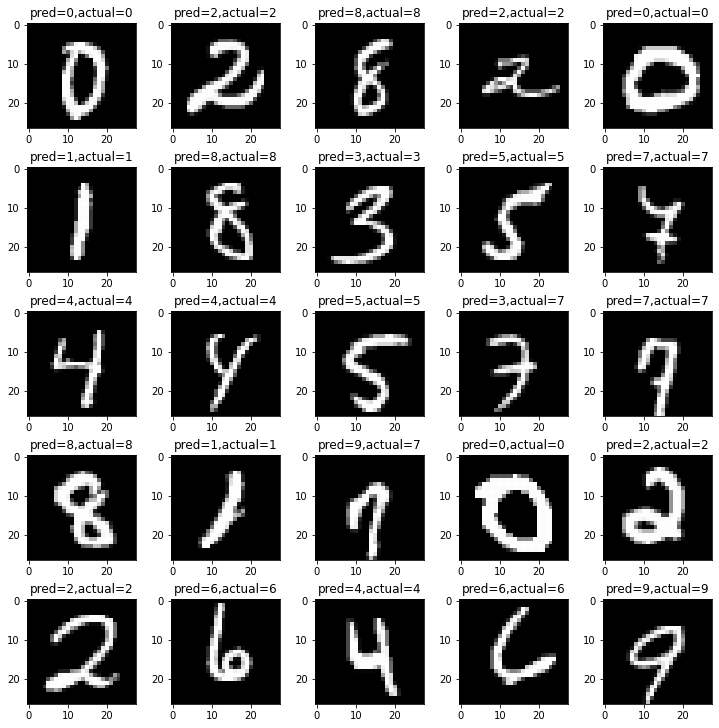

In [90]:
fig, ax = plt.subplots(5,5, figsize=(10,10),constrained_layout=True) # figure 5x5 images
#np.random.seed(30) # random seed to find bad aproximations.
for i in range(5): # horizontal axis
    for j in range(5): # vertical axis
        r = np.random.randint(len(X_test)) # pick a random number 
        image = X_test[r][:-1]
        ax[i,j].imshow(image,cmap=plt.cm.gray) # divide the random row in 28x28 arrays and draw in a plot. 
        ax[i,j].set_title('pred={},actual={}'.format(y_p2[r],y_test[r])) # Title of the respective number

We can see that using neural networks we can increse the accuracy for the prediction, in the previous homework the accuracy of the nmist prediction was 0.875, using a sequential model with the sgd optimizer, we obtein a accuracy of 0.90.